# Assignment (Milestone 3)

We saw a few examples of machine learning algorithms, so at this point it seems like once you get the data ready, machine learning is just "plug and play", but not so fast! 

In this assignment, we learn about **regularization**! Regularization is a means by which we can control how much a machine learning algorithm learns. The controlling is done using a parameter that the algorithm, called the **shrinkage parameter**, which is just an argument of the algorithm. The shrinkage parameter is an example of a **hyper-parameter**. A hyper-parameter is like a knob: by specifying a different value for the hyper-parameter, we control how the training happens, a process called **hyper-parameter tuning**. We talk about this is more detail in the next lesson.

We will look at two examples of regularizaiton: LASSO and Ridge regression. Both LASSO and Ridge regression are implementations of linear regression where we try to minimize prediction error plus some penalty that depends on the model's parameters (or coefficients) and the shrinkage constant (`alpha` in the code below). LASSO penalizes the model's parameters using the sum of the **absolute values** of the parameters (this is also called **L1-regularization**), while Ridge does so based on the sum of the **squared values** of the parameters (this is also called **L2-regularization**). For reasons we cannot elaborate on here, **LASSO has the by-product that it also does feature selection**, whereas Ridge doesn't. So not all regularization results in feature selection.

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_housing = pd.read_csv("data/boston-house-prices.csv", skiprows = 1)
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Here's the description of the data:

- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of non-retail business acres per town.
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dwelling
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distances to five Boston employment centres
- `RAD`: index of accessibility to radial highways
- `TAX`: full-value property-tax rate per \$10,000
- `PTRATIO`: pupil-teacher ratio by town
- `B`: $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of black residents by town
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes in $1000's

To see how regularization works, let's return to the model we trained in the lab from the data above.

In [103]:
X = df_housing.drop(columns = 'MEDV') # removes MEDV from our test data to solve for its predicted values 
y = df_housing['MEDV']

#Splits our data into testing and training to assess accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.416942,0.344513,-1.117966,-0.270395,-0.960137,0.943640,-1.102673,0.654891,-0.523106,-1.144555,-1.601746,0.398294,-1.108176
1,-0.280002,-0.499723,-0.421068,-0.270395,-0.145806,-0.222195,0.832605,0.069475,-0.638367,-0.601866,1.175568,0.448420,0.863237
2,-0.408091,-0.499723,-0.360216,-0.270395,-0.299938,0.679704,0.108207,-0.448063,-0.523106,-0.142668,1.130038,0.434251,-0.678455
3,-0.359270,0.344513,-1.025240,-0.270395,0.171021,1.652175,-0.555824,-0.440721,-0.523106,-0.858301,-2.466811,0.377578,-1.307689
4,-0.000352,-0.499723,1.021988,-0.270395,0.239524,0.017747,-0.580681,0.076309,1.666847,1.539070,0.811330,0.359545,-0.272453


1. Train a linear regression algorithm to predict `MEDV` from the remaining features. <span style="color:red" float:right>[1 point]</span>

In [105]:
# Performs a Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

2. Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance. <span style="color:red" float:right>[2 point]</span>

In [106]:

from sklearn.metrics import mean_squared_error

# Sets RMSE values for test and Training data
rmse_trainLR = mean_squared_error(y_train, y_hat_train) ** 0.5
rmse_testLR = mean_squared_error(y_test, y_hat_test) ** 0.5

print("RMSE on the training data: {:5.5f}.".format(rmse_trainLR))
print("RMSE on the test data: {:5.5f}.".format(rmse_testLR))

RMSE on the training data: 4.76839.
RMSE on the test data: 3.87245.


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

3. Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [107]:

from sklearn import linear_model
#Creates a Lasso Regression Model
clf = linear_model.Lasso(alpha = 0.000001)
clf.fit(X_train, y_train)

# Uses Lasso model to train and test data
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

# Generates RMSE values for training and testing data 
rmse_trainLS = mean_squared_error(y_train, y_hat_train) ** 0.5
rmse_testLS = mean_squared_error(y_test, y_hat_test) ** 0.5

print("For alpha of 0.000001:")
print("RMSE on the training data for Lasso: {:5.5f}.".format(rmse_trainLS))
print("RMSE on the test data for Lasso: {:5.5f}.".format(rmse_testLS))
print("RMSE on the training data for Linear Regression: {:5.5f}.".format(rmse_trainLR))
print("RMSE on the test data for Linear Regression: {:5.5f}.".format(rmse_testLR))

For alpha of 0.000001:
RMSE on the training data for Lasso: 4.76839.
RMSE on the test data for Lasso: 3.87245.
RMSE on the training data for Linear Regression: 4.76839.
RMSE on the test data for Linear Regression: 3.87245.


4. Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model). <span style="color:red" float:right>[5 point]</span>

To make it easier, we have laid out general layout of the code. You can use this if you want or write your own program.

In [108]:
alpha_vals = np.arange(0.01, 5, .01)
iter_coefs = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
iter_train_perf = [] # use this to store training data performance for each iteration
iter_test_perf = []

for x in alpha_vals:
    clf = linear_model.Lasso(alpha = x)
    clf.fit(X_train, y_train)
    
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_hat_train) ** 0.5
    rmse_test = mean_squared_error(y_test, y_hat_test) ** 0.5

    iter_coefs = iter_coefs.append({'alpha': x, 'col': i, 'coef': clf.coef_}, ignore_index = True)
    iter_train_perf.append(rmse_train)
    iter_test_perf.append(rmse_test)
iter_coefs.head()

,alpha,col,coef
0,0.01,0,"[-1.0173555301706105, 0.8937940770706747, 0.05..."
1,0.02,1,"[-0.9877057389669325, 0.8450241143715439, 0.0,..."
2,0.03,2,"[-0.9571370218016407, 0.8009676233786305, -0.0..."
3,0.04,3,"[-0.927254332857128, 0.7609759001240622, -0.0,..."
4,0.05,4,"[-0.8973957099617444, 0.7208297905941141, -0.0..."


5. Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`. <span style="color:red" float:right>[2 point]</span>

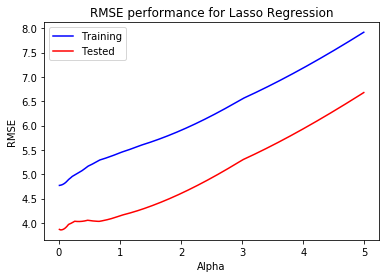

In [109]:
import matplotlib.pyplot as plt

plt.plot(alpha_vals, iter_train_perf,'-b', label = 'Training')
plt.plot(alpha_vals, iter_test_perf,'-r', label = 'Tested')
plt.title('RMSE performance for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

6. Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`! <span style="color:red" float:right>[2 point]</span>

In [125]:
#seperates coefficents for graphing 
coefs = []
for x in alpha_vals:
    clf = linear_model.Lasso(alpha = x)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)

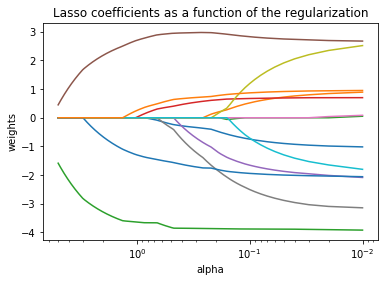

In [125]:
# Visual for Coefficent change
ax = plt.gca()
ax.plot(alpha_vals, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

6. Show that `Ridge` and `Lasso` return the same trained model when `alpha = 0.00001` (i.e. close to zero). <span style="color:red" float:right>[2 point]</span>

In [85]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha = 0.00001)
clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

rmse_trainRD = mean_squared_error(y_train, y_hat_train) ** 0.5
rmse_testRD = mean_squared_error(y_test, y_hat_test) ** 0.5

print("For alpha of 0.00001:")
print("RMSE on the training data for Lasso: {:5.5f}.".format(rmse_trainLS))
print("RMSE on the test data for Lasso: {:5.5f}.".format(rmse_testLS))
print("RMSE on the training data for Ridge: {:5.5f}.".format(rmse_trainRD))
print("RMSE on the test data for Ridge: {:5.5f}.".format(rmse_testRD))

For alpha of 0.00001:
RMSE on the training data for Lasso: 4.76839.
RMSE on the test data for Lasso: 3.87245.
RMSE on the training data for Ridge: 4.76839.
RMSE on the test data for Ridge: 3.87245.


7. Repeat step 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]</span>

In [129]:
alpha_vals = np.arange(0.1, 200, 1)
iter_coefs = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
iter_train_perf = [] # use this to store training data performance for each iteration
iter_test_perf = []


for x in alpha_vals: # loops through each alpha value 
    clf = linear_model.Ridge(alpha = x) # makes a linear model with specified alpha value
    clf.fit(X_train, y_train)
    
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_hat_train) ** 0.5
    rmse_test = mean_squared_error(y_test, y_hat_test) ** 0.5

    iter_coefs = iter_coefs.append({'alpha': x, 'col': i, 'coef': clf.coef_}, ignore_index = True)
    iter_train_perf.append(rmse_train)
    iter_test_perf.append(rmse_test)
iter_coefs.head()

,alpha,col,coef
0,0.1,200,"[-1.0455242408467247, 0.9436935486963988, 0.14..."
1,1.1,200,"[-1.03558681936727, 0.925628947592814, 0.11879..."
2,2.1,200,"[-1.0261076870136137, 0.9084550581113272, 0.09..."
3,3.1,200,"[-1.0170504489535253, 0.8921003185202747, 0.07..."
4,4.1,200,"[-1.008382809111352, 0.8765012822953699, 0.052..."


8. Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`. <span style="color:red" float:right>[1 point]</span>

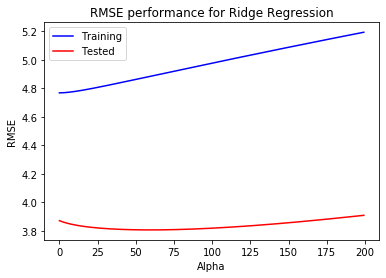

In [130]:
# Generates graphics for performance vs Alpha
import matplotlib.pyplot as plt

plt.plot(alpha_vals, iter_train_perf,'-b', label = 'Training')
plt.plot(alpha_vals, iter_test_perf,'-r', label = 'Tested')
plt.title('RMSE performance for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

9. Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.  <span style="color:red" float:right>[1 point]</span>

In [132]:
#seperates coefficents for graphing 
coefs = []
for x in alpha_vals:
    clf = linear_model.Ridge(alpha = x)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)

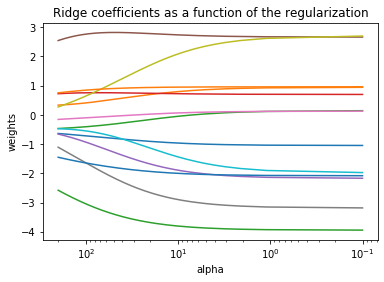

In [132]:
# Visual for Coefficent change
ax = plt.gca()
ax.plot(alpha_vals, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

10. Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge` and `Lasso`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number. <span style="color:red" float:right>[2 point]</span>

For Ridge Regression the coefficients progress to zero with increased shrinkage of alpha. For alpha you would want to pick a value right as the program got to zero for all coefficients. you wouldn't want a higher one than that because that would decrease Efficiency. For Lasso Regressions you would want to also have zero coefficients though the movement of coefficient values is more complex given the mean consideration. 

For Lasso I would choose a alpha as high as possible, given our data and for Ridge I would pick the first acceptable values like 10


# End of assignment